In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
% matplotlib inline

### DEPARTMENT TABLE

In [40]:
dep=pd.read_csv('departments.csv')     #Convert this to a dictionary!!!
dep.head()
depnum=dep.department_id.max()         # number of departments
dep.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [76]:
dep.isnull().sum()                    #no missing values

department_id    0
department       0
dtype: int64

### AISLES TABLE

In [41]:
aisles=pd.read_csv('aisles.csv')
aislenum=aisles.aisle_id.max()           # number of aisle
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [75]:
aisles.isnull().sum()        # no missing values

aisle_id    0
aisle       0
dtype: int64

### ORDERS TABLE

In [42]:
orders=pd.read_csv('orders.csv')
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [55]:
orders.order_number.max()  

100

In [82]:
hrave=orders['order_hour_of_day'].mean()    # ave hour of day for most orders

13.45201534134074

In [83]:
dayave= orders['days_since_prior_order'].mean()   # ave days between orders

11.114836226863012

In [74]:
orders.isnull().sum()      #missing values in orders table

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

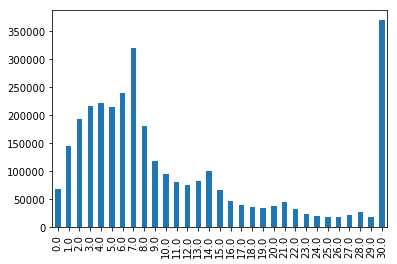

In [69]:
orders.days_since_prior_order.value_counts().sort_index().plot(kind='bar')

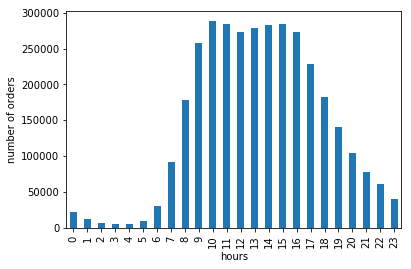

In [62]:
orders.order_hour_of_day.value_counts().sort_index().plot(kind='bar')
_=plt.xlabel('hours')
_=plt.ylabel('number of orders')

### PRODUCTS TABLE

In [56]:
prod=pd.read_csv('products.csv')
prod.head()
prodnum=prod.product_id.max()     #number of products available
prod.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [77]:
prod.isnull().sum()          # no missing value

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

In [44]:
top5prodep=prod.department_id.value_counts().head()    # top 5 departments with most products 
top5prodep

11    6563
19    6264
13    5371
7     4365
1     4007
Name: department_id, dtype: int64

In [72]:
prior=pd.read_csv('order_products__prior.csv')
prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [78]:
prior.isnull().sum()         # no missing values

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [ ]:
train=pd.read_csv('order_products__train.csv')
train.head()

In [79]:
train.isnull().sum()     # no missing values

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [47]:
samp=pd.read_csv('sample_submission.csv')
samp.head()

,order_id,products
0,17,39276 29259
1,34,39276 29259
2,137,39276 29259
3,182,39276 29259
4,257,39276 29259


In [80]:
samp.isnull().sum()     # no missing values

order_id    0
products    0
dtype: int64

In [53]:
print('total number of department= ', depnum)
print('total number of aisle=     ', aislenum)
print('total number of products =',prodnum)

total number of department=  21
total number of aisle=      134
total number of products = 49688
